In [1]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [18]:
import os

# Use double backslashes or a raw string
directory_path = 'C:\\Users\\21BDA012\\Desktop\\Iris.csv'  # Option 1: Double backslashes
# or
# directory_path = r'C:\Users\21BDA012\Desktop\Iris.csv'  # Option 2: Raw string

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import pandas as pd

df = pd.read_csv('/content/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
df['cat_code']=df.Species.astype('category').cat.codes

In [34]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cat_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [35]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cat_code
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   cat_code       150 non-null    int8   
dtypes: float64(4), int64(1), int8(1), object(1)
memory usage: 7.3+ KB


In [37]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'cat_code'],
      dtype='object')

In [38]:
df['cat_code'].unique()

array([0, 1, 2], dtype=int8)

<Axes: >

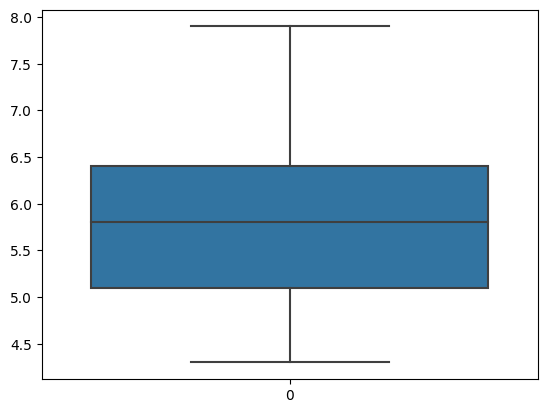

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])

<Axes: >

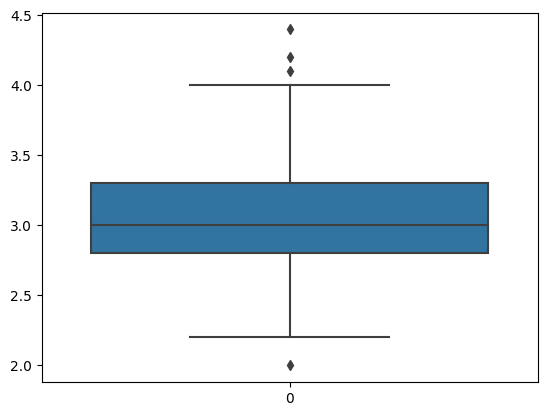

In [40]:
sns.boxplot(df['SepalWidthCm'])

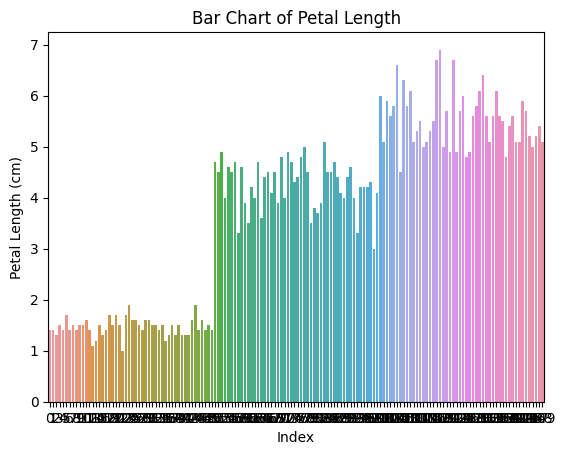

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded with your data
# df = pd.read_csv(r'C:\Users\21BDA012\Desktop\Iris.csv')

# Assuming 'PetalLengthCm' is a column in your DataFrame
sns.barplot(x=df.index, y=df['PetalLengthCm'])

plt.xlabel('Index')  # You can replace 'Index' with the appropriate label for your x-axis
plt.ylabel('Petal Length (cm)')  # Replace 'Petal Length (cm)' with the appropriate label for your y-axis
plt.title('Bar Chart of Petal Length')

plt.show()


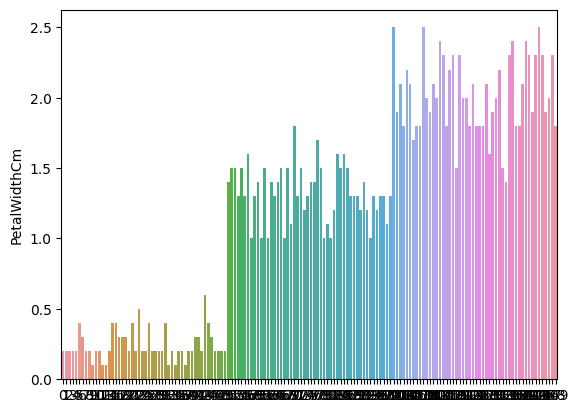

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded with your data
# If not, load the data using pd.read_csv as shown in previous examples

# Create a bar chart for PetalWidthCm
sns.barplot(x=df.index, y=df['PetalWidthCm'])

# Show the plot
plt.show()


In [43]:
def Outlier_Treatment(data1, variable):
    percentile25 = data1[variable].quantile(0.25)
    percentile75 = data1[variable].quantile(0.75)
    iqr=percentile75 - percentile25
    print(percentile25)
    print(percentile75)
    print(iqr)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data1[data1[variable] > upper_limit]
    data1[data1[variable] < lower_limit]
    data1 = data1[(data1[variable] >= lower_limit) & (data1[variable] <= upper_limit)]
    plt.figure(figsize=(12,6))
    sns.boxplot(data1[variable])
    plt.show()
    global data
    data = data1

2.8
3.3
0.5


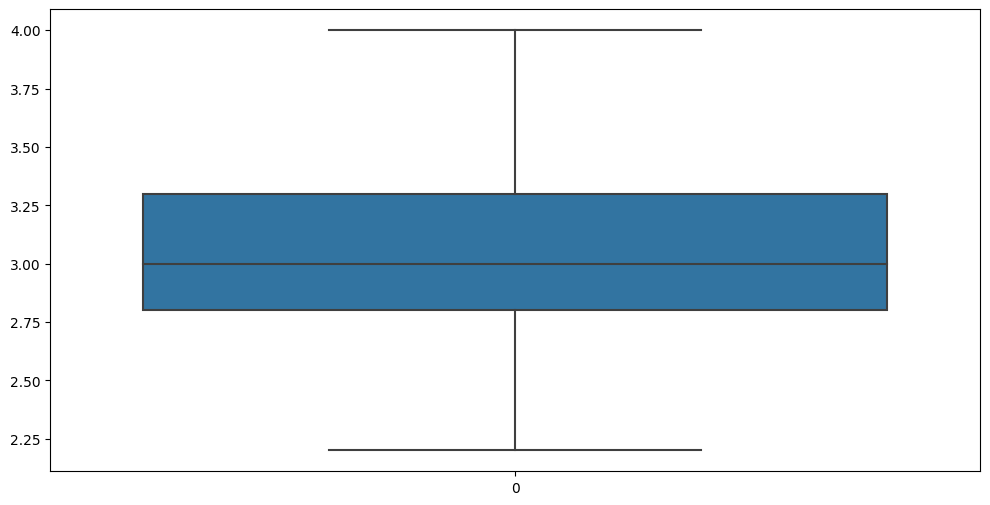

In [44]:
Outlier_Treatment(df, 'SepalWidthCm')

In [45]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y=df['cat_code']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cat_code, Length: 150, dtype: int8

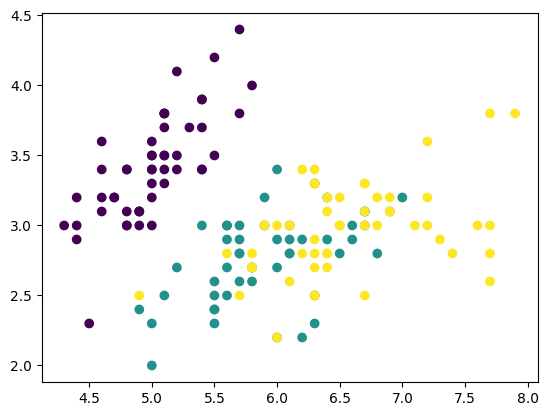

In [47]:
# Visualize the 3 categories of iris flower with respective to Sepal Length and Sepal Width
import matplotlib.pyplot as plt
plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=y)

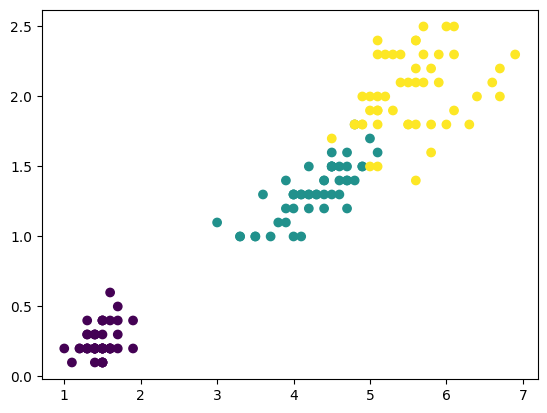

In [48]:
plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=y)


In [49]:
x.shape,y.shape

((150, 4), (150,))

In [50]:
# Splitting train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [51]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = lm.predict(x_test)
y_pred

array([0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 2], dtype=int8)

In [53]:
y_test.values

array([0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 2], dtype=int8)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = lm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [55]:
newval=pd.DataFrame({'SepalLengthCm':[5.2],'SepalWidthCm':[2],'PetalLengthCm':[3.5],'PetalWidthCm':[1]})
lm.predict(newval)

array([1], dtype=int8)

In [56]:
newval=pd.DataFrame({'SepalLengthCm':[5],'SepalWidthCm':[3.5],'PetalLengthCm':[1.4],'PetalWidthCm':[0.2]})
lm.predict(newval)

array([0], dtype=int8)

In [57]:
newval=pd.DataFrame({'SepalLengthCm':[6],'SepalWidthCm':[3],'PetalLengthCm':[5],'PetalWidthCm':[2]})
lm.predict(newval)

array([2], dtype=int8)

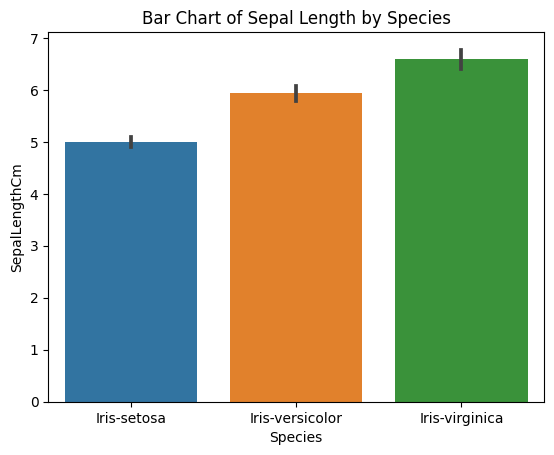

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your data
sns.barplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Bar Chart of Sepal Length by Species')
plt.show()
